In [1]:
import warnings
warnings.filterwarnings('ignore')

# import os
# import argparse
# import json
import cv2
from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from keras.models import load_model
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import imshow
# from matplotlib.patches import Rectangle
%matplotlib inline

Using TensorFlow backend.


In [13]:
'''
葉子辨識
'''

net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.6, 0.45

anchors = [25,33, 52,94, 56,71, 67,83, 68,98, 73,65, 81,96, 116,134, 147,182]
labels = ["AE青楓","DR鳳凰木","FF水同木","FP稜果榕","LF楓香","PF大葉山欖","PP盾柱木","TC大葉欖仁"]
# image_path = 'DSC_4276.jpg'
# image_path = 'P_20191010_135321.jpg'
image_path = 'DSC_4276.jpg'
output_sign = '_yolo_leaf.'

In [45]:
'''
樹木辨識
'''

net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

anchors = [73,171, 98,314, 132,200, 149,357, 199,241, 216,364, 289,389, 331,283, 387,397]
labels = ["AS黑板樹","BJ茄苳","CC樟樹","DR鳳凰木","FM榕樹","KE臺灣欒樹","LF楓香","MA苦楝",
          "MI白千層","MP水黃皮","PC阿勃勒","RR大王椰子","TC大葉欖仁","TM小葉欖仁"]
image_path = 'DSC_5349.jpg'
# image_path = 'IMG_3351.jpg'
# image_path = 'IMG_3414.jpg'
# image_path = 'IMG_3562.jpg'


output_sign = '_yolo_tree.'

In [3]:
'''
葉子辨識
'''

yolov3 = load_model('yolo_leaf.h5')

In [16]:
'''
樹木辨識
'''

yolov3 = load_model('1120_tree.h5')

有10個box
image.shape => (2456, 2456, 3)


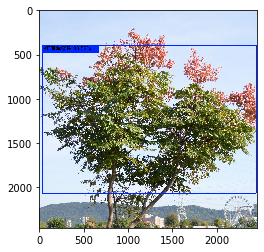

In [47]:

# do detection on an image

image = cv2.imread(image_path)


# predict the bounding boxes
boxes = get_yolo_boxes(yolov3, [image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]
print('有{0}個box'.format(len(boxes)))
# draw bounding boxes on the image using labels
# draw_boxes(image, boxes, labels, obj_thresh, False) 

# draw_boxes(image, boxes, labels, obj_thresh)
image = draw_boxes(image, boxes, labels, obj_thresh)
print('image.shape => {0}'.format(image.shape))

# write the image with bounding boxes to file

cv2.imwrite(image_path.split('.')[0] + output_sign + image_path.split('.')[-1], np.uint8(image))
plt.imshow(image[:,:,::-1])

